3 0 0.0
1 4 1.3258176636680326
2 0 0.0
3 -1 5.961434752782944


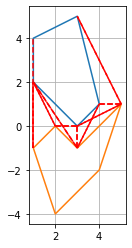

In [8]:
import math
import matplotlib.pyplot as plt

def angle(x, y):
    angle = math.atan2(y, x)
    if angle < 0:
        angle += 2 * math.pi
    return angle

class Node:
    def __init__(self, x, y, node_id=None):
        self.x = x
        self.y = y
        self.id = node_id
        self.degree = angle(x, y)

    def print(self):
        print(f"{self.x} {self.y} {self.degree}")

class Polygon:
    def __init__(self):
        self.node_set = []
        self.node_num = 0
        self.max_node = None
        self.min_node = None

    def push_node(self, p):
        self.node_set.append(p)
        self.node_num += 1
        if self.max_node is None:
            self.max_node = p
        if self.min_node is None:
            self.min_node = p
        if self.max_node.degree - p.degree < 0:
            self.max_node = p
        if self.min_node.degree - p.degree > 0:
            self.min_node = p

# Design the starting point
start_node = Node(0, 0)

polygon_1 = Polygon()
polygon_1.push_node(Node(1, 2, 1))
polygon_1.push_node(Node(1, 4, 2))
polygon_1.push_node(Node(3, 5, 3))
polygon_1.push_node(Node(4, 1, 4))
polygon_1.push_node(Node(3, 0, 5))

polygon_2 = Polygon()
polygon_2.push_node(Node(2, 0, 1))
polygon_2.push_node(Node(3, -1, 2))
polygon_2.push_node(Node(5, 1, 3))
polygon_2.push_node(Node(4, -2, 4))
polygon_2.push_node(Node(2, -4, 5))
polygon_2.push_node(Node(1, -1, 6))

polygon_1.min_node.print()
polygon_1.max_node.print()

polygon_2.min_node.print()
polygon_2.max_node.print()

# Plot the polygons
fig, ax = plt.subplots()
for poly in [polygon_1, polygon_2]:
    x = [node.x for node in poly.node_set]
    y = [node.y for node in poly.node_set]
    x.append(x[0])  # Close the polygon by adding the first point again
    y.append(y[0])
    plt.plot(x, y)
    
    
additional_segments = [
    Segment(Node(1, 2, 1), Node(1, -1, 6)),
    Segment(Node(1, 2, 1), Node(2, 0, 1)),
    Segment(Node(1, 2, 1), Node(3, -1, 2)),
    Segment(Node(3, 5, 3), Node(5, 1, 3)),
    Segment(Node(4, 1, 4), Node(5, 1, 3)),
    Segment(Node(4, 1, 4), Node(3, -1, 2)),
    Segment(Node(3, 0, 5), Node(5, 1, 3)),
    Segment(Node(3, 0, 5), Node(2, 0, 1)),
    Segment(Node(3, 0, 5), Node(3, -1, 2)),
    Segment(Node(2, 0, 1), Node(3, 0, 5)),
    Segment(Node(2, 0, 1), Node(1, 2, 1)),
    Segment(Node(3, -1, 2), Node(4, 1, 4)),
    Segment(Node(3, -1, 2), Node(3, 0, 5)),
    Segment(Node(3, -1, 2), Node(1, 2, 1)),
    Segment(Node(5, 1, 3), Node(3, 5, 3)),
    Segment(Node(5, 1, 3), Node(4, 1, 4)),
    Segment(Node(5, 1, 3), Node(3, 0, 5)),
    Segment(Node(1, -1, 6), Node(1, 2, 1)),
    Segment(Node(1, -1, 6), Node(1, 4, 2))
]


for segment in additional_segments:
    x = [segment.start_node.x, segment.end_node.x]
    y = [segment.start_node.y, segment.end_node.y]
    plt.plot(x, y, color='red', linestyle='--')


plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()
